# Lab 2

# Kishankumar Sathvara (8900065)

## Part 1

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
Lab2_dataset=pd.read_csv('..\..\practical_labs\Lab2_dataset.csv')
Lab2_dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [6]:
X = Lab2_dataset['text']
y = Lab2_dataset['label_num']

In [7]:
vec = CountVectorizer()
X_count = vec.fit_transform(X.values)
X_array = X_count.toarray()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size = 0.2, random_state = 42)

In [9]:
Gnb_model = GaussianNB()
Gnb_model.fit(X_train, y_train)

GaussianNB()

In [10]:
Mnb_model = MultinomialNB()
Mnb_model.fit(X_train, y_train)

MultinomialNB()

In [11]:
Gnb_prediction = Gnb_model.predict(X_test)

Mnb_prediction = Mnb_model.predict(X_test)

In [12]:
Gaussian_accuracy = accuracy_score(y_test, Gnb_prediction)
print('Gaussian accuracy = ', Gaussian_accuracy)

Multinimial_accuracy = accuracy_score(y_test, Mnb_prediction)
print('Multinomial accuracy = ', Multinimial_accuracy)

Gaussian accuracy =  0.9545893719806763
Multinomial accuracy =  0.978743961352657


##### Once the precision has been achieved, I chose the Multinomial classifier since its accuracy is 0.97, more significant than Gaussian's.

## Part 2

In [14]:
AB_NYC_ = pd.read_csv('..\..\practical_labs\AB_NYC_2019.csv')
AB_NYC_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


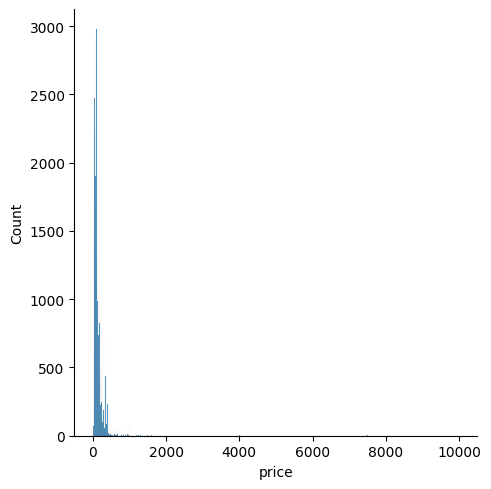

In [16]:
sns.displot(AB_NYC_['price'])

In [17]:
AB_NYC_.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
mean = np.mean(AB_NYC_.price, axis = 0)
mean
sd=AB_NYC_.price.std()

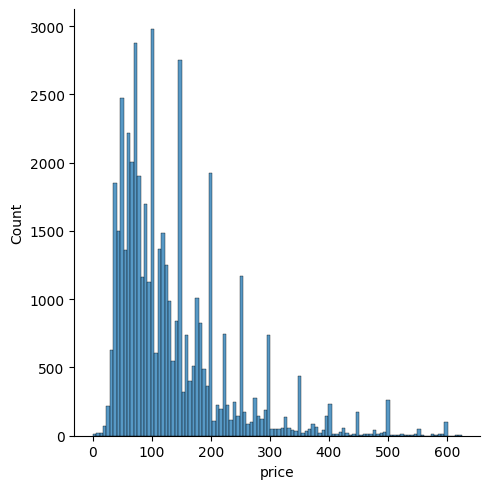

In [19]:
threshold = mean + (2 * sd)
clean_df = AB_NYC_[AB_NYC_['price'] <= threshold]
sns.displot(clean_df['price'])